In [24]:
import pandas as pd
import torch
import sys
from load_data import *
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
dataset = load_data("../dataset/train/train.csv")

train_dataset, valid_dataset = train_test_split(dataset, test_size=0.1, shuffle=True, stratify=dataset['label'], random_state=42)

# 데이터셋 갯수 확인
print('학습 데이터셋 : {}'.format(len(train_dataset)))
print('테스트 데이터셋 : {}'.format(len(valid_dataset)))

학습 데이터셋 : 29223
테스트 데이터셋 : 3247


In [26]:
train_dataset

,id,sentence,subject_entity,object_entity,label
19088,19088,1953년에는 테네시주 멤피스에서 활동하던 선 레코드 소속 프로듀서인 샘 필립스에 ...,'선 레코드','샘 필립스',org:top_members/employees
32150,32150,"2016년 아모레퍼시픽 회장 서경배는 ""까치집을 다시 짓는 마음으로 브랜드를 재정비...",'아모레퍼시픽','서경배',org:top_members/employees
23251,23251,케이블 채널 Xports와 스포츠 언론사 엑스포츠뉴스(2004년 설립)는 모기업이 ...,'Xports','엑스포츠',no_relation
14860,14860,"LS일렉트릭 주식회사(LS ELECTRIC Co., Ltd.)은 1974년 7월 럭...",'LS산전','주식회사',no_relation
17062,17062,새 구장에서 열린 공식경기에서 처음으로 골을 넣은 선수는 튀니지 축구 국가대표팀과 ...,'바이어 04 레버쿠젠','분데스리가',no_relation
...,...,...,...,...,...
4855,4855,경주부윤으로 있을 때는 금강산에 있던 매월당 김시습과 자주 만나 동병상련의 정을 달...,'김시습','매월당',per:alternate_names
29319,29319,"정책협의회에는 더불어민주당 정세균 의원과 백재현 의원, 신경민 의원, 이학영 의원,...",'정의당','심상정',org:top_members/employees
10662,10662,1906년 청나라 제11대 황제인 광서제의 동생 순친왕 짜이펑과 서태후의 측근인 대...,'광서제','청나라',per:origin
18227,18227,"지난 24일 방송된 JTBC 예능 프로그램 '77억의 사랑'에서는 김원효, 심진화 ...",'김원효','심진화',per:spouse


In [27]:
# 데이터 중복을 제외한 갯수 확인
print("학습데이터 : ",train_dataset['sentence'].nunique()," 라벨 : ",train_dataset['label'].nunique())
print("데스트 데이터 : ",valid_dataset['sentence'].nunique()," 라벨 : ",valid_dataset['label'].nunique())

# 중복 데이터 제거
train_dataset.drop_duplicates(subset=['sentence'], inplace= True)
valid_dataset.drop_duplicates(subset=['sentence'], inplace= True)

# 데이터셋 갯수 확인
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_dataset)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(valid_dataset)))

학습데이터 :  26242  라벨 :  30
데스트 데이터 :  3210  라벨 :  30
중복 제거 후 학습 데이터셋 : 26242
중복 제거 후 테스트 데이터셋 : 3210


<ipython-input-27-6d7092d2ae5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset.drop_duplicates(subset=['sentence'], inplace= True)
<ipython-input-27-6d7092d2ae5b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_dataset.drop_duplicates(subset=['sentence'], inplace= True)


In [28]:
# null 데이터 제거
train_dataset['sentence'].replace('', np.nan, inplace=True)
valid_dataset['sentence'].replace('', np.nan, inplace=True)
train_dataset = train_dataset.dropna(how = 'any')
valid_dataset = valid_dataset.dropna(how = 'any')

print('null 제거 후 학습 데이터셋 : {}'.format(len(train_dataset)))
print('null 제거 후 테스트 데이터셋 : {}'.format(len(valid_dataset)))

null 제거 후 학습 데이터셋 : 26242
null 제거 후 테스트 데이터셋 : 3210


/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


## 평균 문장 길이 

길이 잘라서 넣다가 entity가 잘리면??
자르지 말고 bqtt?? 그거 하면되나

학습 문장 최대 길이 : 455
학습 문장의 평균 길이 : 96.12651474735158


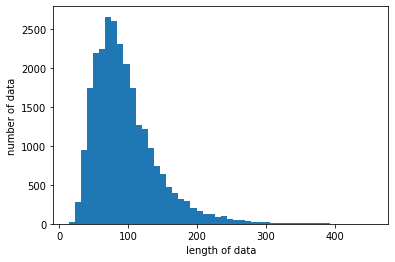

In [32]:
from matplotlib import pyplot as plt

#학습 리뷰 길이조사
print('학습 문장 최대 길이 :',max(len(l) for l in train_dataset['sentence']))
print('학습 문장의 평균 길이 :',sum(map(len, train_dataset['sentence']))/len(train_dataset['sentence']))

plt.hist([len(s) for s in train_dataset['sentence']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

## 클래스 별 분포 확인하기

In [37]:
label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']

In [93]:
train_df = pd.DataFrame(train_dataset, columns = ['label'])
valid_df = pd.DataFrame(valid_dataset, columns = ['label'])

train_df

,label
19088,org:top_members/employees
32150,org:top_members/employees
23251,no_relation
14860,no_relation
17062,no_relation
...,...
26271,no_relation
242,org:top_members/employees
25880,org:members
4855,per:alternate_names


In [94]:
train_df['class'] = train_df['label'].map(lambda x : label_list.index(x))
valid_df['class'] = valid_df['label'].map(lambda x : label_list.index(x))

train_df

,label,class
19088,org:top_members/employees,1
32150,org:top_members/employees,1
23251,no_relation,0
14860,no_relation,0
17062,no_relation,0
...,...,...
26271,no_relation,0
242,org:top_members/employees,1
25880,org:members,2
4855,per:alternate_names,12


## Train set class 분포 

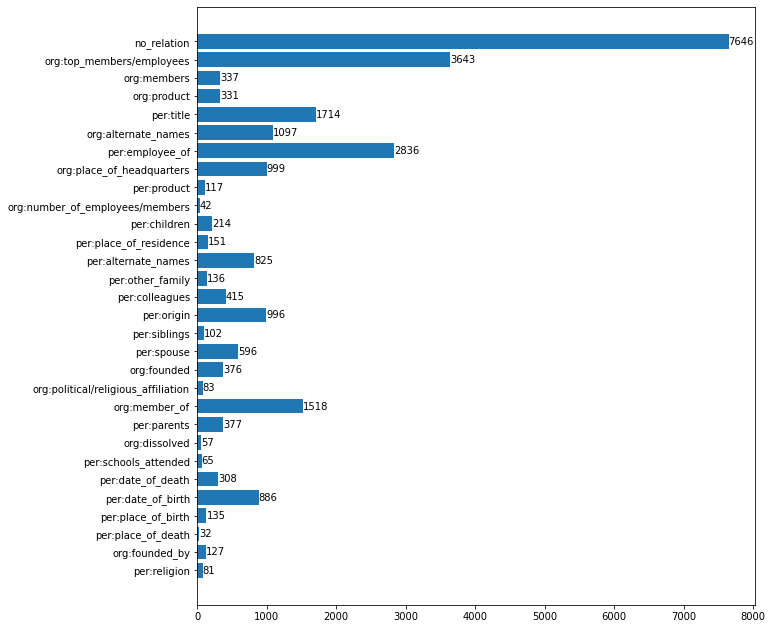

In [141]:
# train 데이터의 클래스 별 개수
train_counts = train_df['class'].value_counts(dropna=False).sort_index().to_frame()

fig, ax = plt.subplots(figsize = (10, 11))

hbars = ax.barh(label_list, train_counts['class'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.bar_label(hbars, fmt='%d')

plt.show()


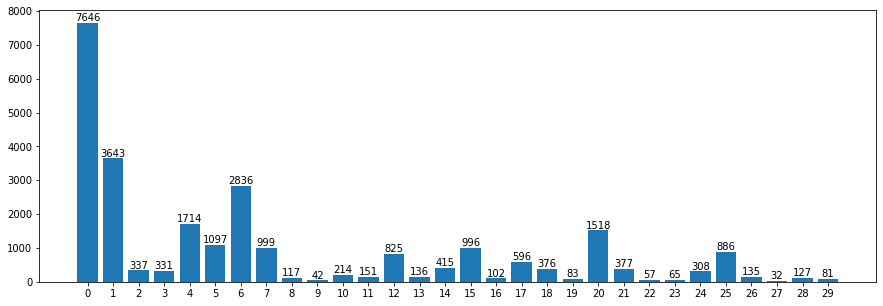

In [142]:
# train 데이터의 클래스 별 개수
train_counts = train_df['class'].value_counts(dropna=False).sort_index() 
# print(list(train_counts))

plt.figure(figsize = (15, 5))
bar = plt.bar(range(30), list(train_counts))
plt.xticks(range(30));

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)
    
plt.show()


## Valid set class 분포 

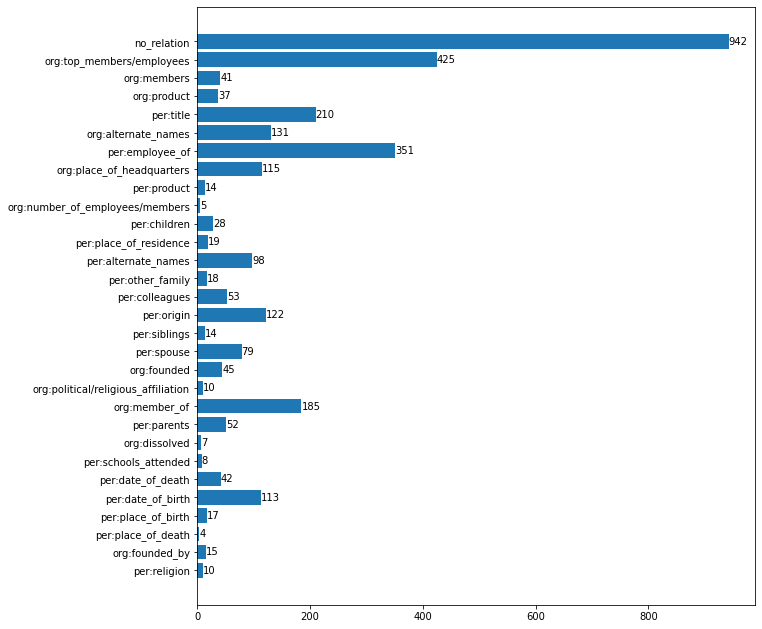

In [144]:
# train 데이터의 클래스 별 개수
valid_counts = valid_df['class'].value_counts(dropna=False).sort_index().to_frame()

fig, ax = plt.subplots(figsize = (10, 11))

hbars = ax.barh(label_list, valid_counts['class'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.bar_label(hbars, fmt='%d')

plt.show()


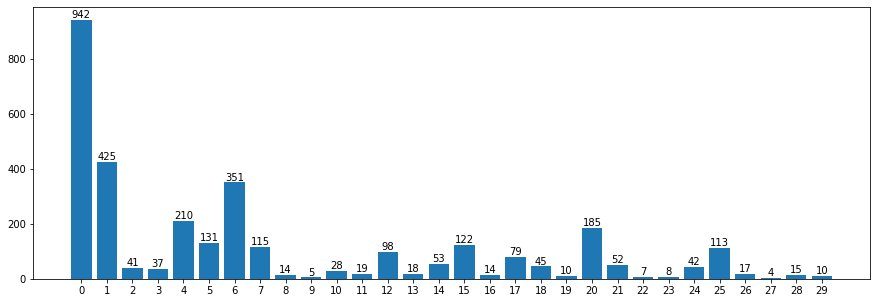

In [145]:
# train 데이터의 클래스 별 개수
valid_counts = valid_df['class'].value_counts(dropna=False).sort_index() 
# print(list(train_counts))

plt.figure(figsize = (15, 5))
bar = plt.bar(range(30), list(valid_counts))
plt.xticks(range(30));

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 10)
    
plt.show()
